In [ ]:
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import torch
import torchvision as tv

opt = TestOptions().parse()  # get test options
# hard-code some parameters for test
opt.num_threads = 1  # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
opt.model='cnn_pix2pix'
opt.netG='unet_4'
opt.dataroot='/home/host/data/training/height29_30km_pix2pix_sathei_all_med29'
opt.preprocess = []
opt.dataset_mode='sathei'
opt.name = 'test_1016'
opt.norm = 'batch'
# opt.ngf = 60
opt.useVAE3 = True

# opt.epoch=390
# opt.input_nc=1
# opt.output_nc=3
opt.preprocess=[]
model = create_model(opt)
model.setup(opt)
model.eval()

# latent_mean, U=torch.load('latent_data/mean_and_pca')

device='cuda:1'
# U=U.to(device).float()

----------------- Options ---------------
                 add_real: False                         
             align_minmax: False                         
             aspect_ratio: 1.0                           
                attention: False                         
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: None                          
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 1                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3  

In [1]:
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import torch
import torchvision as tv
device='cuda:1'

transform_hei = tv.transforms.Compose([tv.transforms.ToTensor(), 
                                       tv.transforms.Normalize((0.5), (0.5))
                                      ])
transform_sat = tv.transforms.Compose([tv.transforms.ToTensor(), 
                                       tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                      ])

In [2]:
from PIL import Image
real_A = Image.open("results/0121b_vae_sathei_all/val_latest/images/Arge_29_0000_S49W075_real_A.png")
real_B = Image.open("results/0121b_vae_sathei_all/val_latest/images/Hima_29_0000_N29E083_real_B.png")
real_C = Image.open("results/0121b_vae_sathei_all/val_latest/images/Arge_29_0000_S49W075_real_C.png")

# img_A_hei = Image.open("Structure.png")
# img_B_hei = Image.open("results/1026_vae_sat_all/test_latest/images/29_0000_N56W131_real_A.png")
# img_A_sat = Image.open("results/1026_vae_sat_all/test_latest/images/29_0001_N27E101_real_A.png")
# img_B_sat = Image.open("results/1026_vae_sat_all/test_latest/images/29_0001_N55W131_real_B.png")
real_A = transform_hei(real_A)[:1, :, :].unsqueeze(0).to(device)
real_B = transform_sat(real_B)[:, :, :].unsqueeze(0).to(device)
real_C = transform_hei(real_C)[:1, :, :].unsqueeze(0).to(device)
# A_hei = transform_hei(img_A_hei)[:1, :, :].unsqueeze(0).to(device)
# B_hei = transform_hei(img_B_hei)[:1, :, :].unsqueeze(0).to(device)
# A_sat = transform_sat(img_A_sat)[:1, :, :].unsqueeze(0).to(device)
# B_sat = transform_sat(img_B_sat).unsqueeze(0).to(device)

In [4]:
import numpy as np
latent_hei = torch.tensor(np.zeros((1, 16, 256, 256)),  dtype=torch.float).to(device)
latent_sat = torch.tensor(np.random.rand(1, 16, 256, 256) * 2 - 1,  dtype=torch.float).to(device)

tensor(-0.2627, device='cuda:1') tensor(0.0824, device='cuda:1')


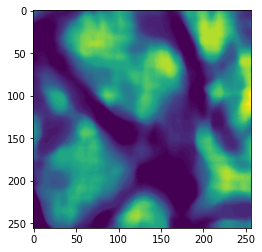

In [6]:
import matplotlib.pyplot as plt
print(real_A[0].min(), real_A[0].max())
plt.imshow(((real_A[0] + 1) / 2).cpu().detach().permute(1,2,0))
# plt.colorbar()

(-0.5, 255.5, 255.5, -0.5)

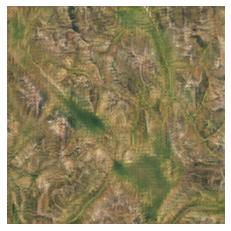

In [38]:
# input_hei = torch.cat((A_hei, latent_hei), dim=1)

model.real_A = real_A
model.real_B = real_B
model.real_C = real_C
model.epoch = -1
model.test()
# hei_model.test()
vis = model.get_current_visuals()
fake = ""
for label, im_data in vis.items():
    if label=='fake_B':
        fake_B = im_data
    elif label == 'fake_C':
        fake_C = im_data
# print(fake1.min(), fake1.max())
# print(torch.nn.L1Loss()(fake, fake1) * 128)
plt.imshow((fake_B[0] / 2 + 0.5).cpu().detach().permute(1, 2, 0))
plt.axis('off')

# plt.colorbar()


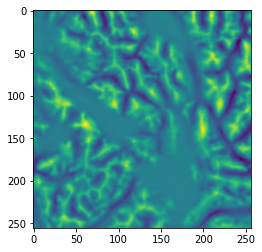

In [31]:
plt.imshow(fake_C[0, 0].cpu().detach())


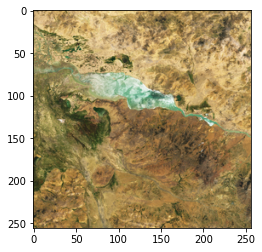

In [32]:
plt.imshow((real_B[0] / 2 + 0.5).cpu().detach().permute(1, 2, 0))


In [26]:
from PIL import Image
img_A_hei = Image.open("results/1026_vae_hei_all/test_latest/images/25_0005_N56W131_real_A.png")
img_B_hei = Image.open("results/1026_vae_hei_all/test_latest/images/25_0005_N56W131_real_B.png")

# img_A_hei = Image.open("Structure.png")
# img_B_hei = Image.open("results/1026_vae_sat_all/test_latest/images/29_0000_N56W131_real_A.png")
img_A_sat = Image.open("results/1026_vae_sat_all/test_latest/images/29_0001_N27E101_real_A.png")
img_B_sat = Image.open("results/1207_vae_sat_all/val_390/images/02_0002_N27E100_real_B.png")
A_hei = transform_hei(img_A_hei)[:1, :, :].unsqueeze(0).to(device)
B_hei = transform_hei(img_B_hei)[:1, :, :].unsqueeze(0).to(device)
A_sat = transform_sat(img_A_sat)[:1, :, :].unsqueeze(0).to(device)
B_sat = transform_sat(img_B_sat).unsqueeze(0).to(device)

sat_model.real_A = fake1
sat_model.real_B = B_sat
# latent_sat = torch.tensor(np.random.rand(1, 16, 256, 256) * 2 - 1 - 1,  dtype=torch.float).to(device)
sat_model.forward()
# hei_model.test()
vis = sat_model.get_current_visuals()
fake = ""
for label, im_data in vis.items():
    if label=='fake_B':
        fake = im_data

plt.axis('off')
plt.imshow((fake[0] / 2 + 0.5).permute(1, 2, 0).cpu().detach())


FileNotFoundError: [Errno 2] No such file or directory: 'results/1026_vae_hei_all/test_latest/images/25_0005_N56W131_real_A.png'

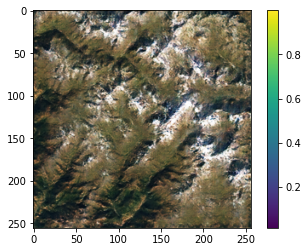

In [62]:
plt.imshow((fake[0] / 2 + 0.5).permute(1, 2, 0).cpu().detach())
plt.colorbar()

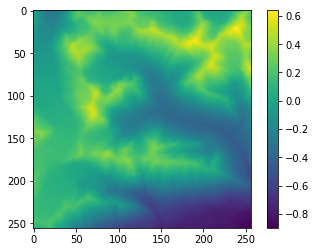

In [9]:
import matplotlib.pyplot as plt
plt.imshow(A_sat[0, 0].cpu().detach())
plt.colorbar()